# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train[0])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle


X_train, y_train = shuffle(X_train, y_train)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?



**Answer:**
I have used sklearn to split the training data into train and validation tests.
I need way to keep test data seperate during training, so not influencing my model during performance evaluvation. However, I still need way to validate during the train. One common approach is to split the traiing data itself to accomdation the validation set. This is exactly what i have followed.


31367 7842


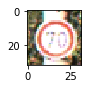

In [5]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needeed
from sklearn.model_selection import train_test_split
import random

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(len(X_train), len(X_validation))
plt.figure(figsize=(1,1))
plt.imshow(X_train[random.randint(0, len(X_train))].squeeze())


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
I have shuffled original training data for model to be independent of ordering of the data. As described above split the train data into train and validation. Validation is used during the training phase to validate the accuracy of the model. And I have used test data after fully satisfied with training to validate the accuracy.

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten
import tensorflow as tf
import math



def LeNet(x, dropout):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    pkeep = dropout
    
    layer1_conv_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    layer1_conv_b = tf.Variable(tf.zeros(6))
    
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    layer1_conv = tf.nn.conv2d(x, layer1_conv_W, strides=[1, 1, 1, 1], padding='VALID') + layer1_conv_b

    # TODO: Activation.
    layer1_conv = tf.nn.relu(layer1_conv)
    layer1_conv = tf.nn.dropout(layer1_conv, pkeep)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    layer1_conv = tf.nn.max_pool(layer1_conv, ksize=[1, 2, 2, 1], strides=[1,2,2,1], padding='VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    
    layer2_conv_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    layer2_conv_b = tf.Variable(tf.zeros(16))
    layer2_conv = tf.nn.conv2d(layer1_conv, layer2_conv_W, strides=[1, 1, 1, 1], padding='VALID') + layer2_conv_b
    
    # TODO: Activation.
    layer2_conv = tf.nn.relu(layer2_conv)
    layer2_conv = tf.nn.dropout(layer2_conv, pkeep)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    layer2_conv = tf.nn.max_pool(layer2_conv, ksize=[1, 2, 2, 1], strides=[1,2,2,1], padding='VALID')
    

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    layer2_conv = flatten(layer2_conv)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    layer3_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    layer3_b = tf.Variable(tf.zeros(120))
    layer3_fcnn = tf.matmul(layer2_conv, layer3_W ) + layer3_b
    
    # TODO: Activation.
    layer3_fcnn = tf.nn.relu(layer3_fcnn)
    layer3_fcnn = tf.nn.dropout(layer3_fcnn, pkeep)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    layer4_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    layer4_b = tf.Variable(tf.zeros(84))
    layer4_fcnn = tf.matmul(layer3_fcnn, layer4_W ) +  layer4_b 
    
    # TODO: Activation.
    layer4_fcnn = tf.nn.relu(layer4_fcnn)
    layer4_fcnn = tf.nn.dropout(layer4_fcnn, pkeep)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    layer5_W = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    layer5_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(layer4_fcnn, layer5_W ) + layer5_b 
    
    return logits


def LeNet_exp(x, dropout):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    layer_input = x
    layer1_conv = None
    n = 32
    channels = 3
    depth = 16
    pkeep = dropout
    
    while n>=5:
        
        layer1_conv_W = tf.Variable(tf.truncated_normal(shape=(5, 5, channels, depth), mean = mu, stddev = sigma))
        layer1_conv_b = tf.Variable(tf.zeros(depth))
    
        # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
        layer1_conv = tf.nn.conv2d(layer_input, layer1_conv_W, strides=[1, 1, 1, 1], padding='VALID') + layer1_conv_b

        # TODO: Activation.
        layer1_conv = tf.nn.relu(layer1_conv)
        layer1_conv = tf.nn.dropout(layer1_conv, pkeep)
        layer_input = layer1_conv
        n = n-5 +1
        channels = 16
        depth = 16
        print(np.shape(layer1_conv))


    # TODO: Flatten. Input = 5x5x16. Output = 400.
    layer2_conv = flatten(layer1_conv)
    n = 256
    out = n-32
    print(n, out)
    
    while n > 84:
        # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
        layer3_W = tf.Variable(tf.truncated_normal(shape=(n, out), mean = mu, stddev = sigma))
        layer3_b = tf.Variable(tf.zeros(out))
        layer3_fcnn = tf.matmul(layer2_conv, layer3_W ) + layer3_b
    
        # TODO: Activation.
        layer3_fcnn = tf.nn.relu(layer3_fcnn)
        layer3_fcnn = tf.nn.dropout(layer3_fcnn, pkeep)
        layer2_conv = layer3_fcnn
        n = out
        out = n-32
        print(n, out)
        

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    layer5_W = tf.Variable(tf.truncated_normal(shape=(n, 43), mean = mu, stddev = sigma))
    layer5_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(layer2_conv, layer5_W ) + layer5_b 
    
    return logits



### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I have followed LeNet() architecture as starting point. I have used total of 5 layes including 3 fully conneccted layers and 2 convolution layers.

The input of the moodel accepts 32x32x3 rgb image data and generates logits classifying into 43 different categories.

*Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6. Activation: Relu, Pooling: Maxpool output: 14x14x6*

*Layer 2: Convolutional. Input = 14x14x6 Output = 10x10x16. Activation: Relu, Pooling: Maxpool output: 5x5x16*

*Layer 3: Fully Connected. Input = 400. Output = 120*

*Layer 4: Fully Connected. Input = 120. Output = 84*

*Layer 5: Fully Connected. Input = 84. Output = 43*

Further improvements:

*Added dropout regularization*

With above architecture i have validation accuracy about .956.

---

Next step, I have modified LeNet to LeNet_exp() with extra convolution and fully connected layers removing the max pooling. Added dropout regularization with rate of 4% dropout. I have results varying from .96 to .978 in multiple runs.

Convolution Layers size in each layer:
layer1: (?, 32, 32, 3)   filter (5,5,3,16)

layer2: (?, 28, 28, 16)  filter (5,5,16,16)

layer3: (?, 24, 24, 16)  filter (5,5,16,16)

layer4: (?, 20, 20, 16)  filter (5,5,16,16)

layer5: (?, 16, 16, 16)  filter (5,5,16,16)

layer6: (?, 12, 12, 16)  filter (5,5,16,16)

layer7: (?, 8, 8, 16)

layer8: (?, 4, 4, 16)

fully connected layer1: Input: 256 out : 224

fully connected layer2: Input: 224 out: 192

fully connected layer3: Input: 192 out: 160

fully connected layer4: Input: 160 out: 128

fully connected layer5: 128 96

fully connected layer6: 96 64

fully connected layer7: 64 43



In [7]:
### Train your model here.
### Feel free to use as many code cells as needed.


BATCH_SIZE = 128
EPOCHS = 30
print(BATCH_SIZE, EPOCHS)

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
dropout = tf.placeholder(tf.float32)
# variable learning rate
lr = tf.placeholder(tf.float32)

rate = 0.001

 # learning rate decay
max_learning_rate = 0.003
min_learning_rate = 0.0001
decay_speed = 2000.0 # 0.003-0.0001-2000=>0.9826 done in 5000 iterations



logits = LeNet_exp(x, dropout=1)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = lr)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

# Initializing the variables
init = tf.global_variables_initializer()


def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(init)
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            learning_rate = min_learning_rate + (max_learning_rate - min_learning_rate) * math.exp(-i/decay_speed)
            learning_rate = rate
            pkeep = 0.96
            sess.run(training_operation, feed_dict={x: batch_x,  y: batch_y, lr: learning_rate, dropout: pkeep})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")


128 30
(?, 28, 28, 16)
(?, 24, 24, 16)
(?, 20, 20, 16)
(?, 16, 16, 16)
(?, 12, 12, 16)
(?, 8, 8, 16)
(?, 4, 4, 16)
256 224
224 192
192 160
160 128
128 96
96 64
64 32
Training...

EPOCH 1 ...
Validation Accuracy = 0.807

EPOCH 2 ...
Validation Accuracy = 0.880

EPOCH 3 ...
Validation Accuracy = 0.934

EPOCH 4 ...
Validation Accuracy = 0.946

EPOCH 5 ...
Validation Accuracy = 0.953

EPOCH 6 ...
Validation Accuracy = 0.945

EPOCH 7 ...
Validation Accuracy = 0.945

EPOCH 8 ...
Validation Accuracy = 0.950

EPOCH 9 ...
Validation Accuracy = 0.919

EPOCH 10 ...
Validation Accuracy = 0.956

EPOCH 11 ...
Validation Accuracy = 0.958

EPOCH 12 ...
Validation Accuracy = 0.963

EPOCH 13 ...
Validation Accuracy = 0.970

EPOCH 14 ...
Validation Accuracy = 0.966

EPOCH 15 ...
Validation Accuracy = 0.964

EPOCH 16 ...
Validation Accuracy = 0.970

EPOCH 17 ...
Validation Accuracy = 0.970

EPOCH 18 ...
Validation Accuracy = 0.974

EPOCH 19 ...
Validation Accuracy = 0.975

EPOCH 20 ...
Validation Accuracy

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I have following parameters for testing:

EPOCH 30
Type Of optimizer: Gradient discent AdamOptmizer with cross entropy
For taining images are batched into 128 each, and with constant leaning rate of of 0.001.

With above parameters, my model reported  Validation Accuracy ~ 0.978 with various runs.
I have experimented with different batch sizes, with decay learning etc. But didn't result in any improved accuracy.





### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

In [8]:
with tf.Session() as sess:
    # Initialize variables
    sess.run(init)

    # Restore model weights from previously saved model
    saver.restore(sess, './lenet')
    print("Model restored from file: %s" % './lenet')

    # Test prediction
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print()
   

Model restored from file: ./lenet
Test Accuracy = 0.910



**Answer:**

1. Since the input data is image  which has spatial significance, so  convolution is the right approach to solve this problem. LeNet provides a starting ground for me to experiment. Results were upto  .95 to .96

2. I have tried increasing convolution layers and fully connected layers  Added drop out (4%) for regularization to decrease the overfit of the layers. And removed max pooling improve the spatial data. Results were upto .97.

3. I have tried various hyper parameters including decaying learnign rate and didn't get great results.

4. Finally as shown as test accuracy is only about .9, compared to validation accuracy ~.976.  


I think there is lot of room for improvement. Including trying different archiitecture using transfer learning etc.
May be more data might help to solve the problem as i didn't see dramatic improvment with increased layers of neurons.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [49]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

from skimage import io as skimageio
from skimage.transform import resize

import glob
import os

def load_images():
    images = []
    for img in glob.glob("germany/*.png"):
        image = skimageio.imread(img)
        print(np.shape(image))
        image = resize(image, (32, 32))
        images.append(image)
    return images

images = load_images()
for image in images:
#    plt.figure(figsize=(1,1))
#    plt.imshow(image,)
    print(image.shape)



(144, 171, 3)
(260, 307, 3)
(373, 398, 3)
(393, 279, 3)
(262, 242, 3)
(844, 911, 3)
(172, 299, 3)
(495, 338, 3)
(199, 164, 3)
(177, 221, 3)
(901, 1089, 3)
(451, 554, 3)
(572, 601, 3)
(322, 431, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



Starting 2nd session...
Model restored from file: ./lenet
SoftMax probabilties...
[[  1.00506970e-03   2.54641920e-02   2.63077021e-02   2.79427897e-02
    3.30485441e-02   6.31034523e-02   3.77175864e-04   4.28119041e-02
    1.61349047e-02   1.24743050e-02   6.69308892e-03   1.24432321e-03
    2.36592125e-02   4.44830358e-02   1.30409859e-02   5.75758696e-01
    1.03245862e-02   1.28764485e-03   3.53429117e-03   2.52757396e-04
    6.69482490e-03   9.17858153e-04   1.65119418e-03   1.03208795e-03
    5.59735869e-04   4.07613022e-03   3.45648476e-03   1.59071220e-04
    7.57069152e-04   5.42773120e-03   1.17648533e-03   9.14134667e-04
    7.07749918e-04   2.80459761e-03   4.04211134e-03   3.64982500e-03
    2.55122734e-03   7.87747791e-04   4.98881890e-03   4.13412135e-03
    1.21011995e-02   1.59061525e-03   6.87041599e-03]
 [  2.60260934e-03   3.36142592e-02   2.10833419e-02   1.37534559e-01
    3.72037776e-02   1.44651070e-01   2.01997254e-02   3.17601375e-02
    3.14847231e-02   2.1

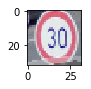

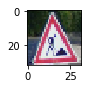

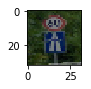

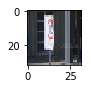

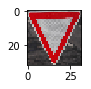

In [53]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

# Running a new session
print("Starting 2nd session...")

logits_max = tf.argmax(logits, 1)
softmax = tf.nn.softmax(logits)

with tf.Session() as sess:
    # Initialize variables
    sess.run(init)

    # Restore model weights from previously saved model
    saver.restore(sess, './lenet')
    print("Model restored from file: %s" % './lenet')

    # Test prediction
    pkeep = 1
    #batch_x = images[:]
    #print(np.shape(batch_x))
    #print(np.shape(images))
    batch_x = shuffle(images)
    #preds = sess.run(logits, feed_dict={x: batch_x[:5] , dropout: pkeep})
    for image in batch_x[:5]:
        plt.figure(figsize=(1,1))
        plt.imshow(image,)
    print('SoftMax probabilties...')
    #print(preds)
    preds_pb = sess.run(softmax, feed_dict={x: batch_x[:5], dropout: pkeep})
    print(preds_pb)
    top_kv = sess.run(tf.nn.top_k(tf.constant(preds_pb), k=5))
    print('TOPK values....')
    print(top_kv)
    pred_max = sess.run(logits_max, feed_dict={logits: preds_pb})
    print('Max Value....')
    print(pred_max)
    
        
        
    
    

**Answer:**

I have chosen, german traffic signs from google street view available online and tested accuracy with  code. Although my model performed very well on test data with .91 accuracy it failed miserably here. Looking at max prob each prediction for 5 values images

0.5, 0.14, 0.6, 0.4, 0.4 which clearly tells why model is uncertain.

**I think  test captured images from steet view exhibit scale, rotation (angle, perspecitive) and resolution issues making  classifcation hard**


I think model needs to be trained to be resilient to scale and rotation variance either probbaly adding normalization or with lot of data sets from multiple perspecitives.




### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


In [55]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
import pandas as pd

data = pd.read_csv('./signnames.csv', header=0)
print(data)
print(pred_max)
print(data.ix[pred_max])

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vehicles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

**Answer:**

Very bad results with accuracy of 0. Not sure why it perfomed so bad.


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

TopKV2(values=array([[ 0.5757587 ,  0.06310345,  0.04448304,  0.0428119 ,  0.03304854],

       [ 0.14465107,  0.13753456,  0.11434145,  0.05301125,  0.04447545],
       
       [ 0.60584283,  0.04699126,  0.04306898,  0.04217138,  0.02734674],
       
       [ 0.40742108,  0.0776884 ,  0.06032614,  0.05300293,  0.03640298],
       
       [ 0.46586668,  0.07367416,  0.06297477,  0.04406381,  0.04035053]], dtype=float32)
       
First image, model 57% confidant that it is Class 15(No Vehicle) sign

Second image, 14% confidance that it is speed limit (80).

Third image, 60% confidnace that it is class 15, No Vehicle sign

Fouth image, 40% confidance that it is class 15, No Vehicle sign

5th image, 46% confidance that it is class 15, No vehicle sign.

All the above results are actually wrong. I hink model needs to absorbe scale invariant either thru prepocessing or more data.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.